#### Testeo Modelos 
En este sección vamos a realizar testeos de los diferentes modelos que se guardaron.

Recorda que hicimos entrenamiento por separado. Por un lado tenemos un entrenamiento basado solo en 
latitudes y longitudes, es decir un modelo de predicción de latitudes y longitudes, y por otro lado se tiene un modelo dedicado solo a la prediccion de las alturas. 

In [56]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [57]:
x_test = pd.read_csv("./Train_Test/x_test.csv")
y_test = pd.read_csv("./Train_Test/y_test.csv")

In [58]:
autoencoder_Lat_Lon = tf.keras.models.load_model('modelos_entrenamiento/entrenamiento_lat_lon2.keras')
autoencoder_Height = tf.keras.models.load_model('modelos_entrenamiento/entrenamiento_alturas2.keras')

In [68]:
# Predecimos una muestra en particular de mi df
idx = 0 
#=====Latitudes Longitudes=====
y_pred_lat_lon = autoencoder_Lat_Lon.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_true =y_test.iloc[idx]
# Separamos Latitudes Longitudes
y_true_latitudes = y_true[0:100]
y_true_longitudes = y_true[100:200]
y_pred_latitudes = y_pred_lat_lon[0,0:100]
y_pred_longitudes = y_pred_lat_lon[0,100:200]

#====== Alturas =======
y_pred_heights = autoencoder_Height.predict(np.expand_dims(x_test.iloc[idx], axis = 0))
y_pred_heights = y_pred_heights[0,0:100]
y_true_heights = y_true[200:300]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


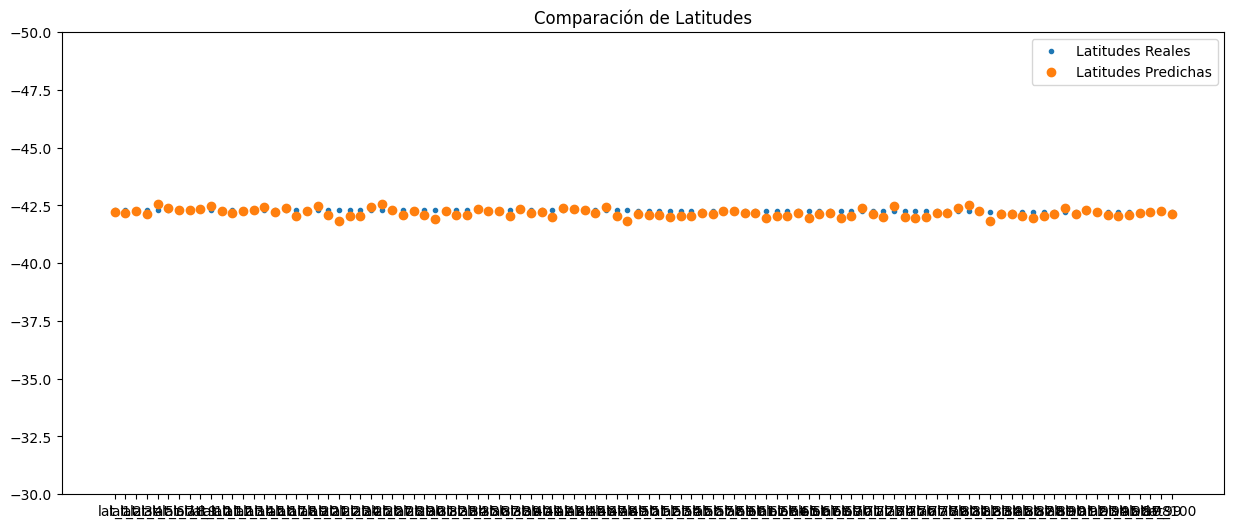

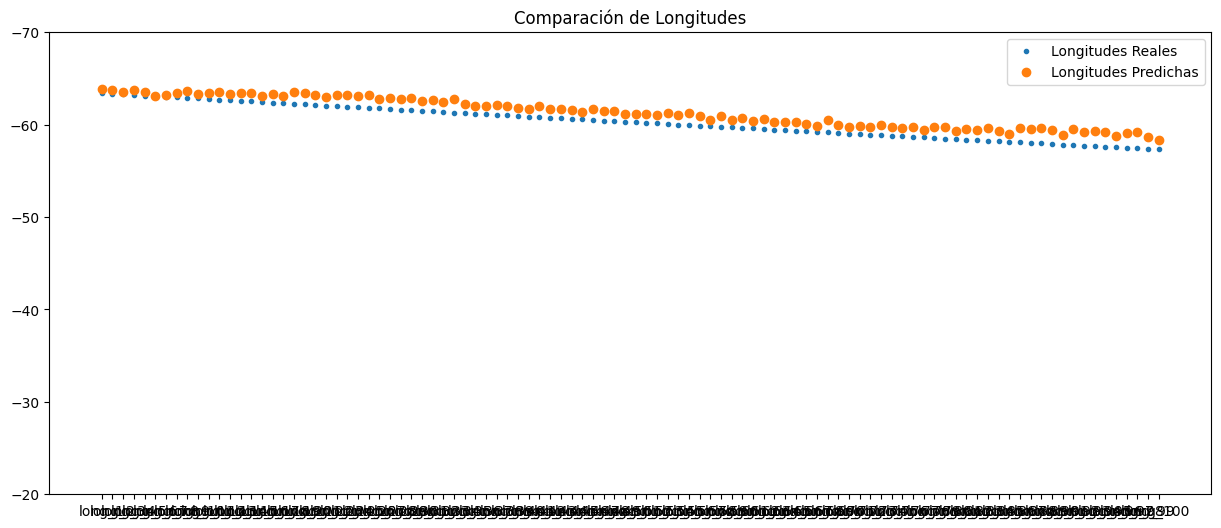

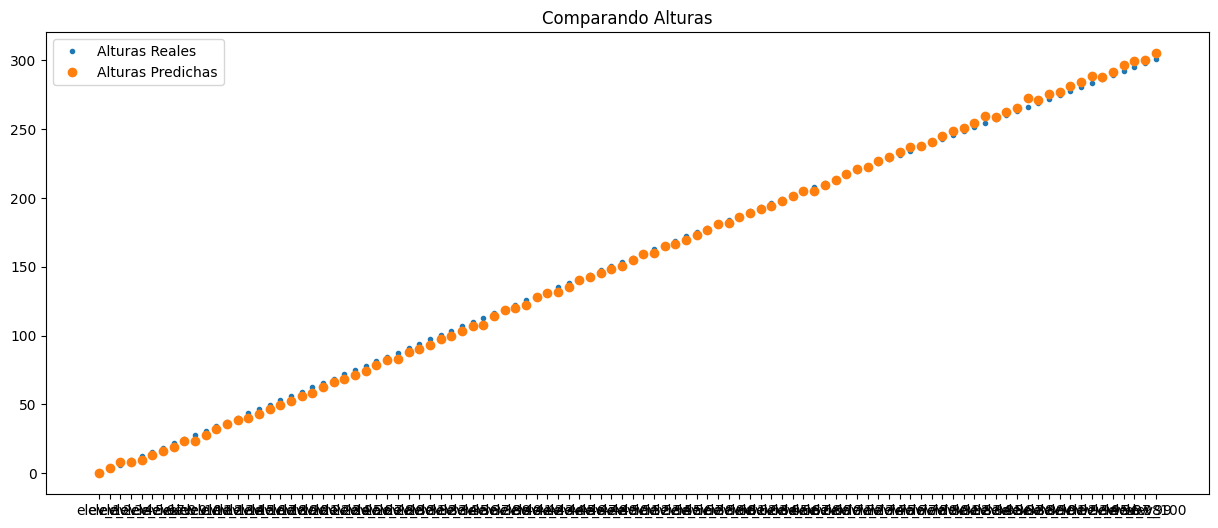

In [69]:
# Grafica Latitudes 
plt.figure(figsize = (15,6))
plt.plot(y_true_latitudes, label = 'Latitudes Reales', linestyle = 'None', marker = '.')
plt.plot(y_pred_latitudes, label = 'Latitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-30,-50)
plt.title('Comparación de Latitudes')
plt.legend()
plt.show()

# Graf. Longitudes
plt.figure(figsize=(15,6))
plt.plot(y_true_longitudes,label= 'Longitudes Reales', linestyle = 'None',marker= '.')
plt.plot(y_pred_longitudes,label= 'Longitudes Predichas', linestyle = 'None', marker = 'o')
plt.ylim(-20,-70)
plt.title("Comparación de Longitudes")
plt.legend()
plt.show()

# Graf. Alturas
plt.figure(figsize=(15,6))
plt.plot(y_true_heights, label = "Alturas Reales",linestyle= 'None', marker = '.')
plt.plot(y_pred_heights, label = "Alturas Predichas", linestyle = 'None', marker = 'o')
plt.title("Comparando Alturas")
plt.legend()
plt.show()

In [61]:
print(type(y_pred_latitudes))

<class 'numpy.ndarray'>
